# Μέρος 1: Ημι-επιβλεπόμενη Μάθηση

Όνομα: Kristi Cami AEM:167

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error

**Φόρτωση δεδομένων**

In [ ]:
df = pd.read_csv('wine-missing.csv')

**Περιγραφή των δεδομένων**

In [ ]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


**Δημιουργία ιστογραμμάτων για κάθε χαρακτηριστικό**

Κατά τη δημιουργία των ιστογραμμάτων, οι κενές τιμές (NaN) αγνοήθηκαν για να μην επηρεαστεί η οπτικοποίηση της κατανομής των δεδομένων. Αυτή η προσέγγιση επιτρέπει την απεικόνιση των χαρακτηριστικών χωρίς να αλλοιώνεται το συνολικό τους σχήμα. Οι κενές τιμές θα αντιμετωπιστούν κατάλληλα στα επόμενα στάδια της ανάλυσης.


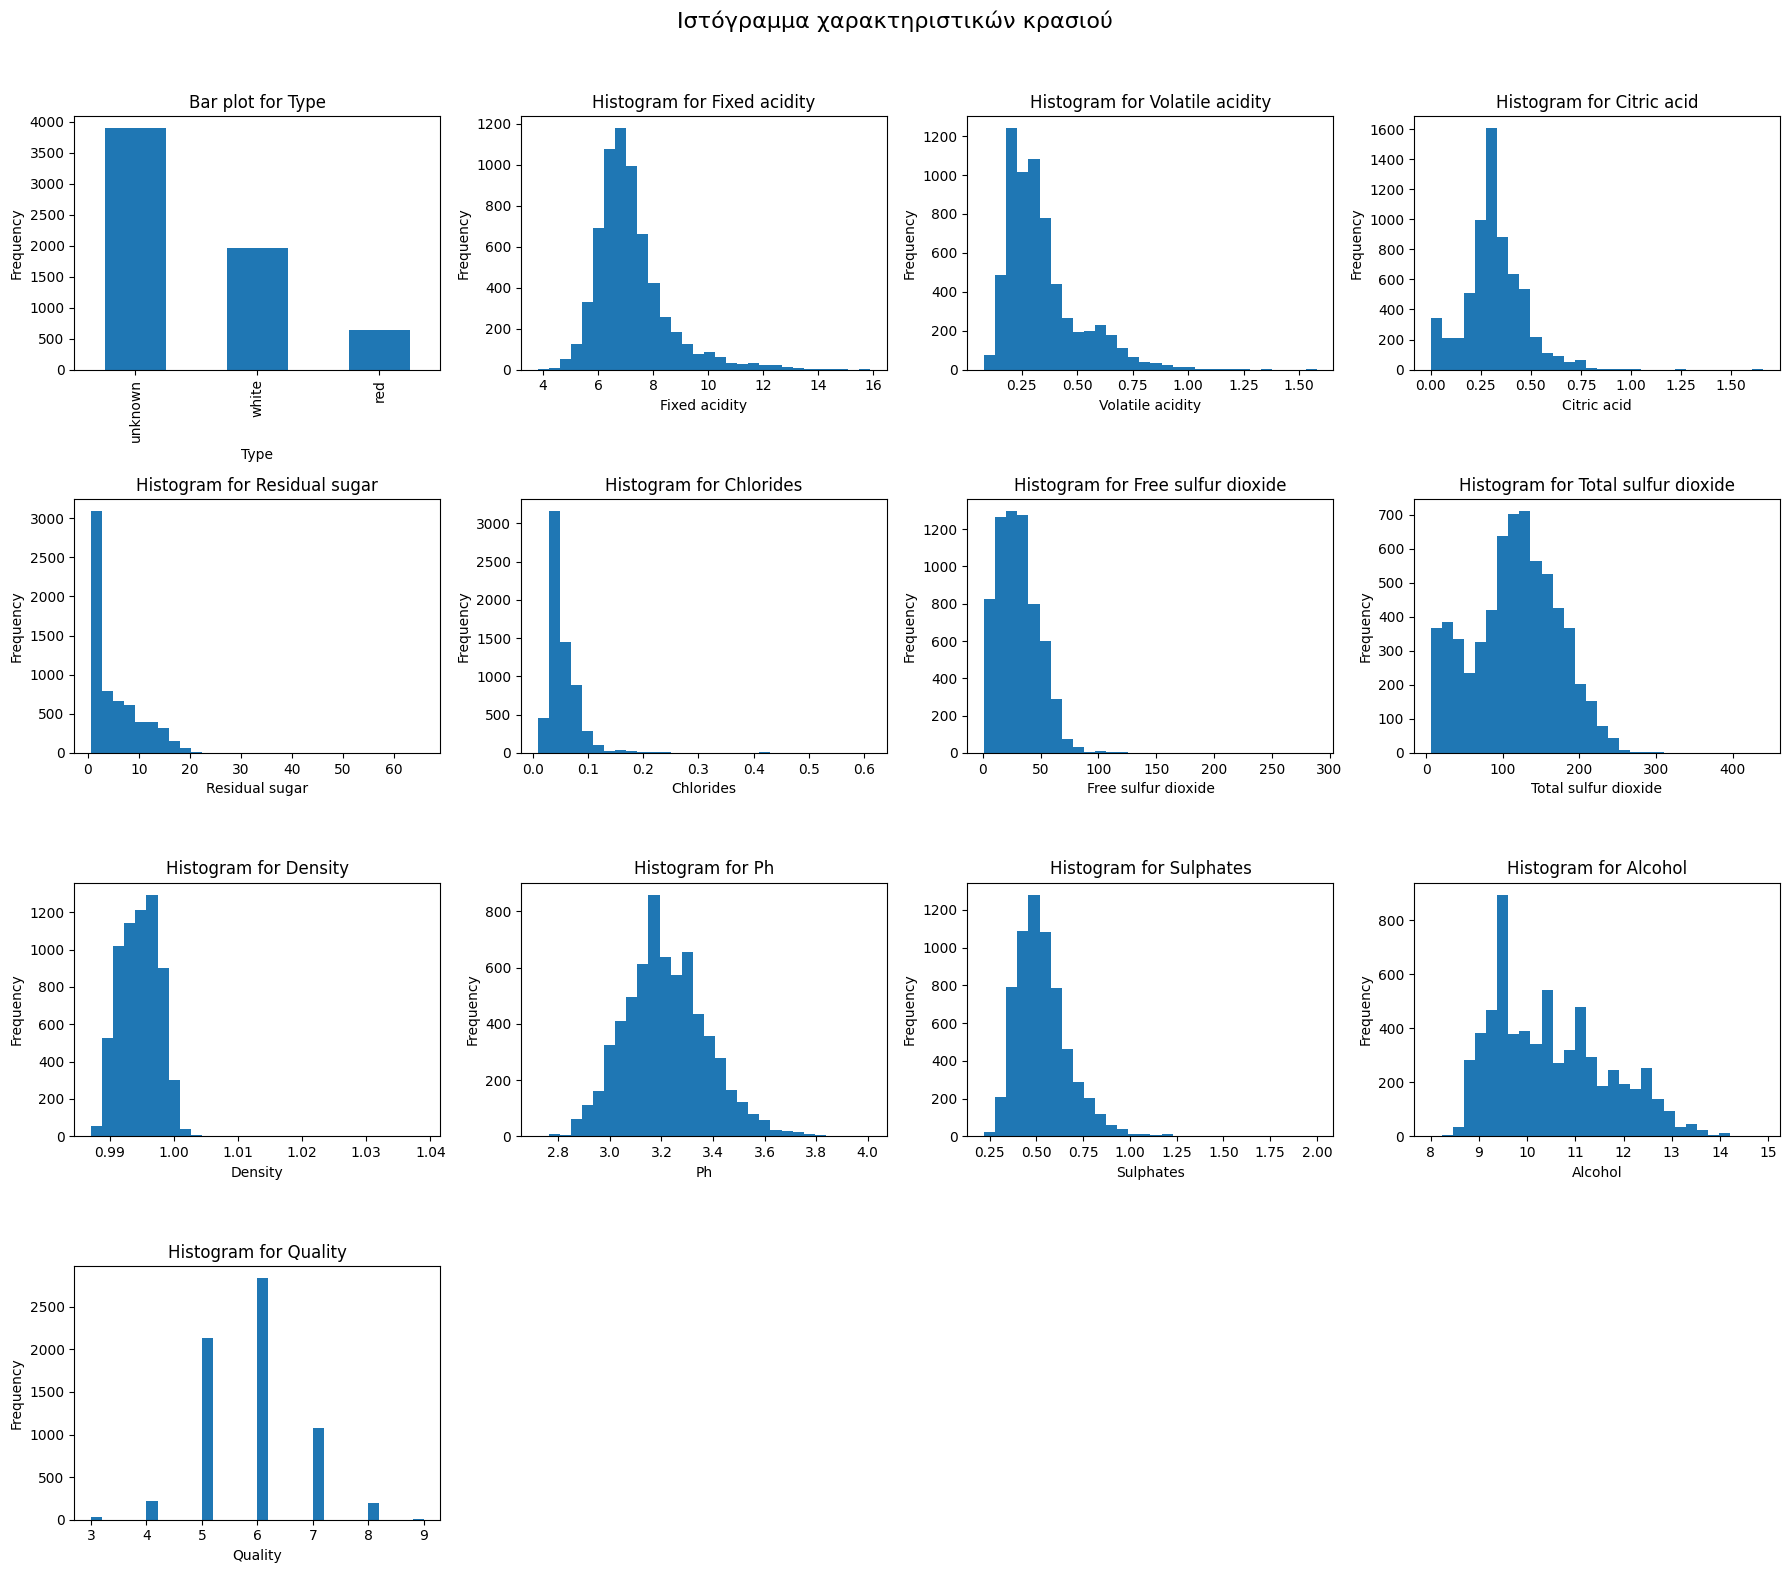

In [ ]:
# Ρύθμιση του μεγέθους και της διάταξης των γραφημάτων
fig, axes = plt.subplots(4, 4, figsize=(18, 16))  # 4 σειρές x 4 στήλες
fig.suptitle('Ιστόγραμμα χαρακτηριστικών κρασιού', fontsize=16)

# Λίστα με όλα τα ονόματα στηλών που θα εξεταστούν
columns = df.columns

# Εμφάνιση των διαγραμμάτων
for idx, column in enumerate(columns):
    row, col = divmod(idx, 4)  # Υπολογισμός θέσης
    ax = axes[row, col]  # Επιλογή του κατάλληλου άξονα

    if column == 'type':
        df[column].value_counts().plot(kind='bar', ax=ax, title=f'Bar plot for {column.capitalize()}')
    elif pd.api.types.is_numeric_dtype(df[column]):
        df[column].dropna().plot(kind='hist', ax=ax, bins=30, title=f'Histogram for {column.capitalize()}')

    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Frequency')

# Αφαίρεση κενών διαγραμμάτων, αν υπάρχουν
for i in range(len(columns), 16):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Προσαρμογή για τον τίτλο
plt.show()

**Αντικατάσταση των τιμών του Type σε αριθμούς**

In [ ]:
df['type'] = df['type'].map({'white': 0, 'red': 1, 'unknown': 2})

**Δημιουργία των arrays x και y**

In [ ]:
x = df.drop(columns=['type']).values
y = df['type'].values

**Δημιουργία των συνόλων δεδομένων**

In [ ]:
known_mask = df['type'] != 2  # Μάσκα για τα γνωστά δεδομένα
unknown_mask = df['type'] == 2  # Μάσκα για τα άγνωστα δεδομένα

x_known = x[known_mask]
y_known = y[known_mask]
x_unknown = x[unknown_mask]

**Χωρισμός δεδομένων εκπαίδευσης-δοκιμής**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    x_known, y_known, test_size=0.3, random_state=0, stratify=y_known
)

**Εκπαίδευση του μοντέλου**

In [ ]:
clf = RandomForestClassifier(random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

**Πρόβλεψη στο test set**

In [ ]:
y_pred = clf.predict(x_test)

**Υπολογισμός μετρικών**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9935897435897436
F1 Score: 0.9935840982423545
Precision: 0.993582848941563
Recall: 0.9935897435897436


Το Accuracy αντιπροσωπεύει την συνολική ακρίβεια του μοντέλου (ποσοστό σωστών προβλέψεων), ενώ το F1 Score είναι μια πιο ευαίσθητη μέτρηση, που συνδυάζει το Precision και το Recall και αποδίδει καλύτερα σε μη ισορροπημένα δεδομένα, καθώς ενσωματώνει και την ποιότητα των θετικών και αρνητικών προβλέψεων.

Στο συγκεκριμένο dataset, όπου οι κλάσεις φαίνεται να είναι ισορροπημένες (λόγω της ομοιότητας όλων των μετρικών), τόσο το Accuracy όσο και το F1 Score είναι εξίσου αντιπροσωπευτικά. Σε περίπτωση μη ισορροπημένων δεδομένων, θα προτιμούσαμε το F1 Score για να έχουμε μια καλύτερη εικόνα της απόδοσης του μοντέλου.

**Επανεκπαίδευση του μοντέλου με class_weight='balanced'**

In [ ]:
clf_balanced = RandomForestClassifier(random_state=0, class_weight='balanced')
clf_balanced.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

Η παράμετρος class_weight='balanced' στο RandomForestClassifier χρησιμοποιείται για την αντιμετώπιση του προβλήματος των μη ισορροπημένων κλάσεων. Όταν αυτή η παράμετρος έχει την τιμή balanced, το μοντέλο υπολογίζει αυτόματα το βάρος κάθε κλάσης με βάση την αναλογία της στο σύνολο δεδομένων. Έτσι, οι κλάσεις με λιγότερα δείγματα λαμβάνουν μεγαλύτερο βάρος, ενώ οι κλάσεις με περισσότερα δείγματα λαμβάνουν μικρότερο βάρος. Αυτό βοηθάει στη βελτίωση της ακρίβειας του μοντέλου.

**Πρόβλεψη στο test set**

In [ ]:
y_pred_balanced = clf_balanced.predict(x_test)

**Υπολογισμός μετρικών**

In [ ]:
accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
f1_balanced = f1_score(y_test, y_pred_balanced, average='weighted')
precision_balanced = precision_score(y_test, y_pred_balanced, average='weighted')
recall_balanced = recall_score(y_test, y_pred_balanced, average='weighted')

print("Με class_weight='balanced'")
print("Accuracy:", accuracy_balanced)
print("F1 Score:", f1_balanced)
print("Precision:", precision_balanced)
print("Recall:", recall_balanced)

Με class_weight='balanced'
Accuracy: 0.9948717948717949
F1 Score: 0.9948717948717949
Precision: 0.9948717948717949
Recall: 0.9948717948717949


**Υπολογισμός πιθανοτήτων για τα άγνωστα δείγματα**

In [ ]:
y_unknown_proba = clf_balanced.predict_proba(x_unknown)
print("Πιθανότητες κατηγοριών για τα άγνωστα δείγματα:", y_unknown_proba)

Πιθανότητες κατηγοριών για τα άγνωστα δείγματα: [[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]]


**Δημιουργία ετικετών για τα άγνωστα δεδομένα**

In [ ]:
y_unknown_pred = []
for proba in y_unknown_proba:
    if proba[1] > 0.7:
        y_unknown_pred.append(1)  # red
    elif proba[0] > 0.7:
        y_unknown_pred.append(0)  # white
    else:
        y_unknown_pred.append(2)  # διατηρούμε την άγνωστη τιμή (unknown)

**Μετατροπή της λίστας σε numpy array**

In [ ]:
y_unknown_pred = np.array(y_unknown_pred)
print("Ετικέτες για τα άγνωστα δείγματα:", y_unknown_pred)

Ετικέτες για τα άγνωστα δείγματα: [0 0 0 ... 1 1 1]


**Συνένωση των συνόλων δεδομένων**

In [ ]:
x_combined = np.vstack((x_train, x_unknown))
y_combined = np.concatenate((y_train, y_unknown_pred))

**Επανεκπαίδευση του μοντέλου**

In [ ]:
clf_final = RandomForestClassifier(random_state=0, class_weight='balanced')
clf_final.fit(x_combined, y_combined)

RandomForestClassifier(class_weight='balanced', random_state=0)

**Υπολογισμός ακρίβειας στο test set**

In [ ]:
y_final_pred = clf_final.predict(x_test)
final_accuracy = accuracy_score(y_test, y_final_pred)

print("Τελική ακρίβεια στο test set μετά την επανεκπαίδευση:", final_accuracy)

Τελική ακρίβεια στο test set μετά την επανεκπαίδευση: 0.9923076923076923


Παρατηρούμε ότι η τελική ακρίβεια μειώθηκε ελαφρώς. Αυτή η μικρή μείωση είναι λογική, καθώς τα δεδομένα που προσθέσαμε περιέχουν προβλέψεις του μοντέλου και δεν είναι πραγματικά labeled data. Η προσθήκη τέτοιων δεδομένων μπορεί να ενισχύσει την ποσότητα των δεδομένων εκπαίδευσης, αλλά μπορεί επίσης να εισαγάγει κάποιο βαθμό αβεβαιότητας ή θορύβου στις προβλέψεις.

# Μέρος 2: Αξιολόγηση Μοντέλων

**Φόρτωση δεδομένων**

In [ ]:
df_full = pd.read_csv('wine-full.csv')

**Αντικατάσταση των τιμών του Type σε αριθμούς (white = 0, red = 1)**

In [ ]:
df_full['type'] = df_full['type'].map({'white': 0, 'red': 1})

**Εμφάνιση περιγραφικών στατιστικών για το χαρακτηριστικό 'quality'**

In [ ]:
print(df_full['quality'].value_counts())

quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


**Δημιουργία ραβδογράμματος για το χαρακτηριστικό 'quality'**

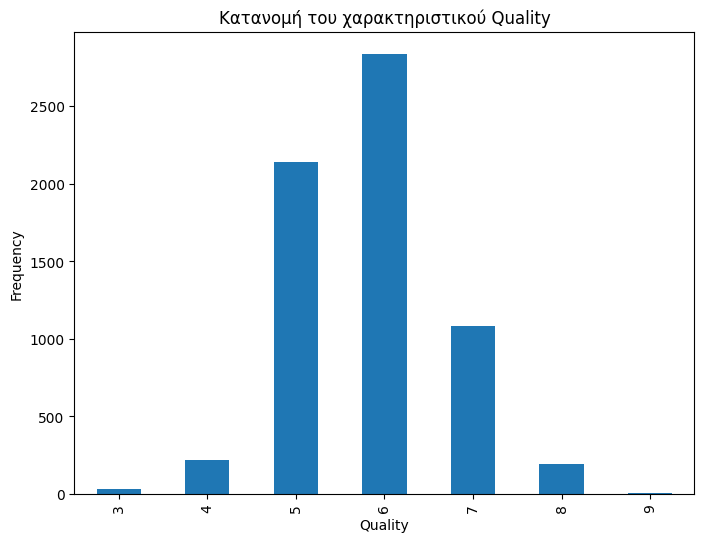

In [ ]:
plt.figure(figsize=(8, 6))
df_full['quality'].value_counts().sort_index().plot(kind='bar')
plt.title('Κατανομή του χαρακτηριστικού Quality')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.show()

Παρατηρούμε ότι το χαρακτηριστικό quality δεν είναι ισορροπημένο (unbalanced), καθώς οι περισσότερες τιμές συγκεντρώνονται γύρω από ένα συγκεκριμένο εύρος, ενώ οι ακραίες τιμές είναι σημαντικά λιγότερες. Σε ένα ισορροπημένο σύνολο δεδομένων, θα περιμέναμε πιο ομοιόμορφη κατανομή των τιμών του quality.



**Υπολογισμός μέσης ποιότητας ανά τύπο κρασιού**

Για να απαντήσουμε στο ερώτημα αν το κόκκινο ή το λευκό κρασί είναι ποιοτικά καλύτερο, υπολογίστηκε η μέση τιμή του χαρακτηριστικού quality για κάθε τύπο κρασιού

In [ ]:
quality_by_type = df_full.groupby('type')['quality'].mean()
print("Μέση ποιότητα για κάθε τύπο κρασιού:\n", quality_by_type)

Μέση ποιότητα για κάθε τύπο κρασιού:
 type
0    5.877909
1    5.636023
Name: quality, dtype: float64


Από τις μέσες τιμές, παρατηρήθηκε ότι το λευκό κρασί έχει ελαφρώς υψηλότερη ποιότητα σε σύγκριση με το κόκκινο. Αυτή η διαφορά επιβεβαιώνεται και από το παρακάτω box plot που απεικονίζει την κατανομή ποιότητας για κάθε τύπο κρασιού.

**Δημιουργία boxplot για την ποιότητα ανά τύπο κρασιού**

<Figure size 800x600 with 0 Axes>

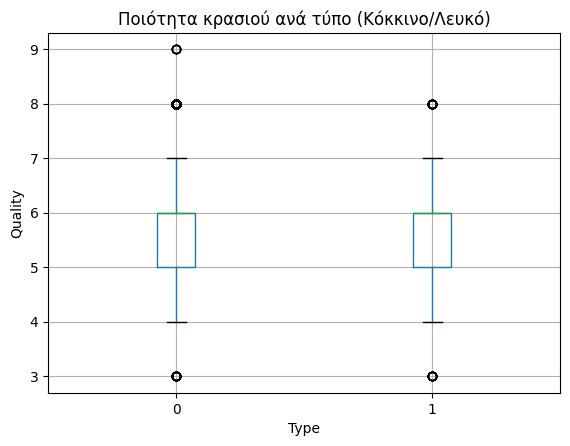

In [ ]:
plt.figure(figsize=(8, 6))
df_full.boxplot(column='quality', by='type')
plt.title('Ποιότητα κρασιού ανά τύπο (Κόκκινο/Λευκό)')
plt.suptitle('')
plt.xlabel('Type')
plt.ylabel('Quality')
plt.show()

**Ορισμός κατωφλίου για διαχωρισμό γλυκών και ξηρών κρασιών**

In [ ]:
sugar_threshold = 5
df_full['sweetness'] = df_full['residual sugar'].apply(lambda x: 'Sweet' if x > sugar_threshold else 'Dry')

Για να συγκρίνουμε την ποιότητα γλυκών και ξηρών κρασιών, κατηγοριοποιούμε  τα κρασιά ως "Sweet" όταν τα υπολειπόμενα σάκχαρα (residual sugar) είναι πάνω από 5 και ως "Dry" όταν είναι ίσα ή λιγότερα από 5.

**Υπολογισμός μέσης ποιότητας για κάθε κατηγορία γλυκύτητας**

In [ ]:
quality_by_sweetness = df_full.groupby('sweetness')['quality'].mean()
print("Μέση ποιότητα για γλυκά και ξηρά κρασιά:\n", quality_by_sweetness)

Μέση ποιότητα για γλυκά και ξηρά κρασιά:
 sweetness
Dry      5.843057
Sweet    5.780715
Name: quality, dtype: float64


Όπως φαίνεται από τα αποτελέσματα και το παρακάτω box plot, τα ξηρά κρασιά έχουν ελαφρώς υψηλότερη μέση ποιότητα σε σχέση με τα γλυκά.

**Δημιουργία boxplot για την ποιότητα ανά κατηγορία γλυκύτητας**

<Figure size 800x600 with 0 Axes>

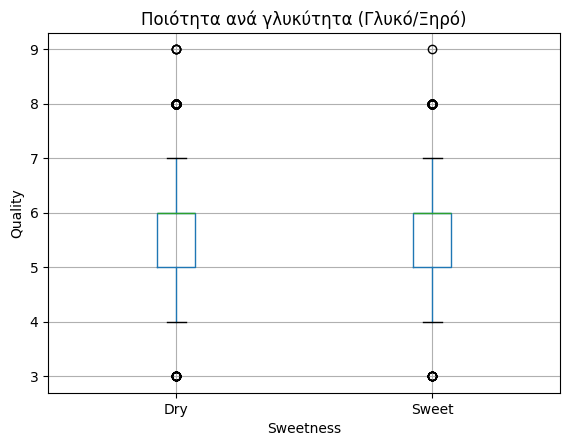

In [ ]:
plt.figure(figsize=(8, 6))
df_full.boxplot(column='quality', by='sweetness')
plt.title('Ποιότητα ανά γλυκύτητα (Γλυκό/Ξηρό)')
plt.suptitle('')
plt.xlabel('Sweetness')
plt.ylabel('Quality')
plt.show()

**Αφαίρεση της στήλης sweetness, εφόσον δεν χρειάζεται πλέον για το μοντέλο**

In [ ]:
df_full = df_full.drop(columns=['sweetness'])

**Δημιουργία arrays x και y**

In [ ]:
x_full = df_full.drop(columns=['quality'])
y_full = df_full['quality']

**Χωρισμός σε train-test με αναλογία 90-10**

In [ ]:
x_train_full, x_test_full, y_train_full, y_test_full = train_test_split(
    x_full, y_full, test_size=0.1, random_state=0
)

**Εκπαίδευση DecisionTreeRegressor**

In [ ]:
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train_full, y_train_full)

DecisionTreeRegressor(random_state=0)

**Πρόβλεψη στο test set**

In [ ]:
y_pred_full = regressor.predict(x_test_full)

**Υπολογισμός MAE και NMAE**

In [ ]:
mae = mean_absolute_error(y_test_full, y_pred_full)
nmae = mae / y_test_full.mean()  # Normalized MAE

print("Mean Absolute Error (MAE):", mae)
print("Normalized Mean Absolute Error (NMAE):", nmae)

Mean Absolute Error (MAE): 0.44769230769230767
Normalized Mean Absolute Error (NMAE): 0.07724980090257498


**Επαναληπτικός διαχωρισμός σε train και test με διαφορετικά seeds**

In [ ]:
mae_list = []
nmae_list = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=seed)

    # Εκπαίδευση του μοντέλου με το ίδιο random_state=0
    regressor = DecisionTreeRegressor(random_state=0)
    regressor.fit(x_train, y_train)

    # Υπολογισμός MAE και NMAE στο test set
    y_pred = regressor.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    nmae = mae / y_test.mean()

    mae_list.append(mae)
    nmae_list.append(nmae)

**Υπολογισμός μέσου όρου και τυπικής απόκλισης**

In [ ]:
mean_mae = np.mean(mae_list)
std_mae = np.std(mae_list)
mean_nmae = np.mean(nmae_list)
std_nmae = np.std(nmae_list)

print("Μέσο MAE:", mean_mae)
print("Τυπική απόκλιση MAE:", std_mae)
print("Μέσο NMAE:", mean_nmae)
print("Τυπική απόκλιση NMAE:", std_nmae)

Μέσο MAE: 0.8184952380952382
Τυπική απόκλιση MAE: 0.03051556969968373
Μέσο NMAE: 0.6238237013533456
Τυπική απόκλιση NMAE: 0.05190599082527587


Η χαμηλή τυπική απόκλιση στις μετρήσεις MAE και NMAE υποδεικνύει ότι το μοντέλο είναι αξιόπιστο και το αναμενόμενο σφάλμα του είναι σταθερό. Αυτές οι τιμές μας βοηθούν στο να είμαστε πιο βέβαιοι ότι το μοντέλο θα αποδίδει με παρόμοιο τρόπο σε νέα δεδομένα.

**Χωρισμός του αρχικού train σε νέο train και validation με 80-20**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=0
)

**Λίστα συνδυασμών υπερπαραμέτρων για fine-tuning**

In [ ]:
param_combinations = [
    {'max_depth': 3, 'min_samples_split': 2},
    {'max_depth': 5, 'min_samples_split': 2},
    {'max_depth': 7, 'min_samples_split': 2},
    {'max_depth': 3, 'min_samples_split': 5},
    {'max_depth': 5, 'min_samples_split': 5},
    {'max_depth': 7, 'min_samples_split': 5},
    {'max_depth': 3, 'min_samples_split': 10},
    {'max_depth': 5, 'min_samples_split': 10},
    {'max_depth': 7, 'min_samples_split': 10},
    {'max_depth': None, 'min_samples_split': 2},
    {'max_depth': None, 'min_samples_split': 5},
    {'max_depth': None, 'min_samples_split': 10},
    {'max_depth': 10, 'min_samples_split': 2},
    {'max_depth': 10, 'min_samples_split': 5},
    {'max_depth': 10, 'min_samples_split': 10}
]

**Δοκιμή κάθε συνδυασμού υπερπαραμέτρων**

In [ ]:
results = []

for params in param_combinations:
    regressor = DecisionTreeRegressor(random_state=0, **params)
    regressor.fit(x_train, y_train)

    # Υπολογισμός MAE στο train set
    y_train_pred = regressor.predict(x_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Υπολογισμός MAE στο validation set
    y_val_pred = regressor.predict(x_val)
    val_mae = mean_absolute_error(y_val, y_val_pred)

    # Αποθήκευση αποτελεσμάτων
    results.append({
        'params': params,
        'train_mae': train_mae,
        'val_mae': val_mae
    })

**Εύρεση των καλύτερων παραμέτρων**

In [ ]:
best_train = min(results, key=lambda x: x['train_mae'])
best_val = min(results, key=lambda x: x['val_mae'])

print("Καλύτερες παράμετροι για το train set:", best_train['params'], "με MAE:", best_train['train_mae'])
print("Καλύτερες παράμετροι για το validation set:", best_val['params'], "με MAE:", best_val['val_mae'])

Καλύτερες παράμετροι για το train set: {'max_depth': None, 'min_samples_split': 2} με MAE: 0.0008552490912978405
Καλύτερες παράμετροι για το validation set: {'max_depth': None, 'min_samples_split': 5} με MAE: 0.5062678062678063


**Βέλτιστες παράμετροι από fine-tuning στο training set**

In [ ]:
best_params_train = {'max_depth': None, 'min_samples_split': 2}
regressor_train = DecisionTreeRegressor(random_state=0, **best_params_train)
regressor_train.fit(x_train_full, y_train_full)
y_test_pred_train = regressor_train.predict(x_test_full)
mae_test_train = mean_absolute_error(y_test_full, y_test_pred_train)

**Βέλτιστες παράμετροι από fine-tuning στο validation setα**

In [ ]:
best_params_val = {'max_depth': None, 'min_samples_split': 5}
regressor_val = DecisionTreeRegressor(random_state=0, **best_params_val)
regressor_val.fit(x_train_full, y_train_full)
y_test_pred_val = regressor_val.predict(x_test_full)
mae_test_val = mean_absolute_error(y_test_full, y_test_pred_val)

In [ ]:
print("MAE στο test set με βέλτιστες παραμέτρους από το training set:", mae_test_train)
print("MAE στο test set με βέλτιστες παραμέτρους από το validation set:", mae_test_val)

MAE στο test set με βέλτιστες παραμέτρους από το training set: 0.44769230769230767
MAE στο test set με βέλτιστες παραμέτρους από το validation set: 0.45717948717948714


Για το συγκεκριμένο σύνολο δεδομένων, οι παράμετροι που προέκυψαν από το training set δίνουν ελαφρώς καλύτερη απόδοση στο test set. Ωστόσο, είναι γενικά καλύτερη πρακτική να χρησιμοποιούμε το validation set για fine-tuning, καθώς παρέχει πιο αντικειμενική εκτίμηση των παραμέτρων για άγνωστα δεδομένα.

**Δημιουργία των x και y σύμφωνα με την Ερώτηση 4**

In [ ]:
x = df_full.drop(columns=['quality'])
y = df_full['quality']

**Διαχωρισμός σε train και test set με αναλογία 90-10**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

**Ορισμός των παραμέτρων για fine-tuning**

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10]
}

**Ορισμός του GridSearchCV με 10-fold cross-validation**

In [ ]:
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1  # Χρήση όλων των πυρήνων του επεξεργαστή
)

**Εκτέλεση του grid search στο train set**

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

**Καλύτεροι παράμετροι και MAE στο train set**

In [ ]:
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Αντιστροφή σε θετικό MAE

print("Καλύτεροι παράμετροι από το cross-validation:", best_params)
print("Μέσο MAE από το cross-validation:", best_score)

Καλύτεροι παράμετροι από το cross-validation: {'max_depth': None, 'min_samples_split': 2}
Μέσο MAE από το cross-validation: 0.4882879639386489


**Πρόβλεψη στο test set χρησιμοποιώντας τις βέλτιστες παραμέτρους**

In [ ]:
best_model = grid_search.best_estimator_
y_test_pred = best_model.predict(x_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("MAE στο test set με βέλτιστες παραμέτρους από το cross-validation:", mae_test)

MAE στο test set με βέλτιστες παραμέτρους από το cross-validation: 0.44769230769230767


**Χρήση του καλύτερου μοντέλου από το GridSearchCV στην Ερώτηση 9**

In [ ]:
y_test_pred_best = best_model.predict(x_test)

**Υπολογισμός NMAE στο test set**

In [ ]:
nmae_best = mae_test / y_test.mean()

print("NMAE στο test set με το καλύτερο μοντέλο από την Ερώτηση 9:", nmae_best)

NMAE στο test set με το καλύτερο μοντέλο από την Ερώτηση 9: 0.07724980090257498


Η πιο αξιόπιστη μεθοδολογία για επιλογή παραμέτρων αποδείχθηκε το cross-validation της ερώτησης 9. Με το 10-fold cross-validation, το μοντέλο αξιολογήθηκε σε πολλαπλά διαχωριστικά σύνολα του training set, επιτυγχάνοντας χαμηλό MAE (0.4477) και NMAE (0.0772) στο test set. Αυτό εξασφαλίζει καλύτερη γενίκευση και μειώνει τον κίνδυνο υπερεκπαίδευσης σε σύγκριση με τη σταθερή προσέγγιση του ερωτήματος 7 και τη μεγαλύτερη αστάθεια που παρατηρήθηκε στην ερώτηση 6

**Ορισμός των παραμέτρων για fine-tuning, με σταθερό max_depth=5**

In [ ]:
param_grid = {
    'max_depth': [5],  # Σταθερό max_depth
    'min_samples_split': [2, 5, 10]
}

**Ορισμός του GridSearchCV με 10-fold cross-validation**

In [ ]:
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=0),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,
    n_jobs=-1
)

**Εκτέλεση του grid search στο train set**

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

**Καλύτερες παράμετροι και μέσο MAE από το cross-validation**

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Καλύτερες παράμετροι από το cross-validation με max_depth=5:", best_params)

Καλύτερες παράμετροι από το cross-validation με max_depth=5: {'max_depth': 5, 'min_samples_split': 2}


**Πρόβλεψη στο test set χρησιμοποιώντας τις βέλτιστες παραμέτρους**

In [ ]:
y_test_pred = best_model.predict(x_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("MAE στο test set με το καλύτερο μοντέλο από το cross-validation:", mae_test)

MAE στο test set με το καλύτερο μοντέλο από το cross-validation: 0.5534852696756091


**Απεικόνιση του καλύτερου δέντρου**

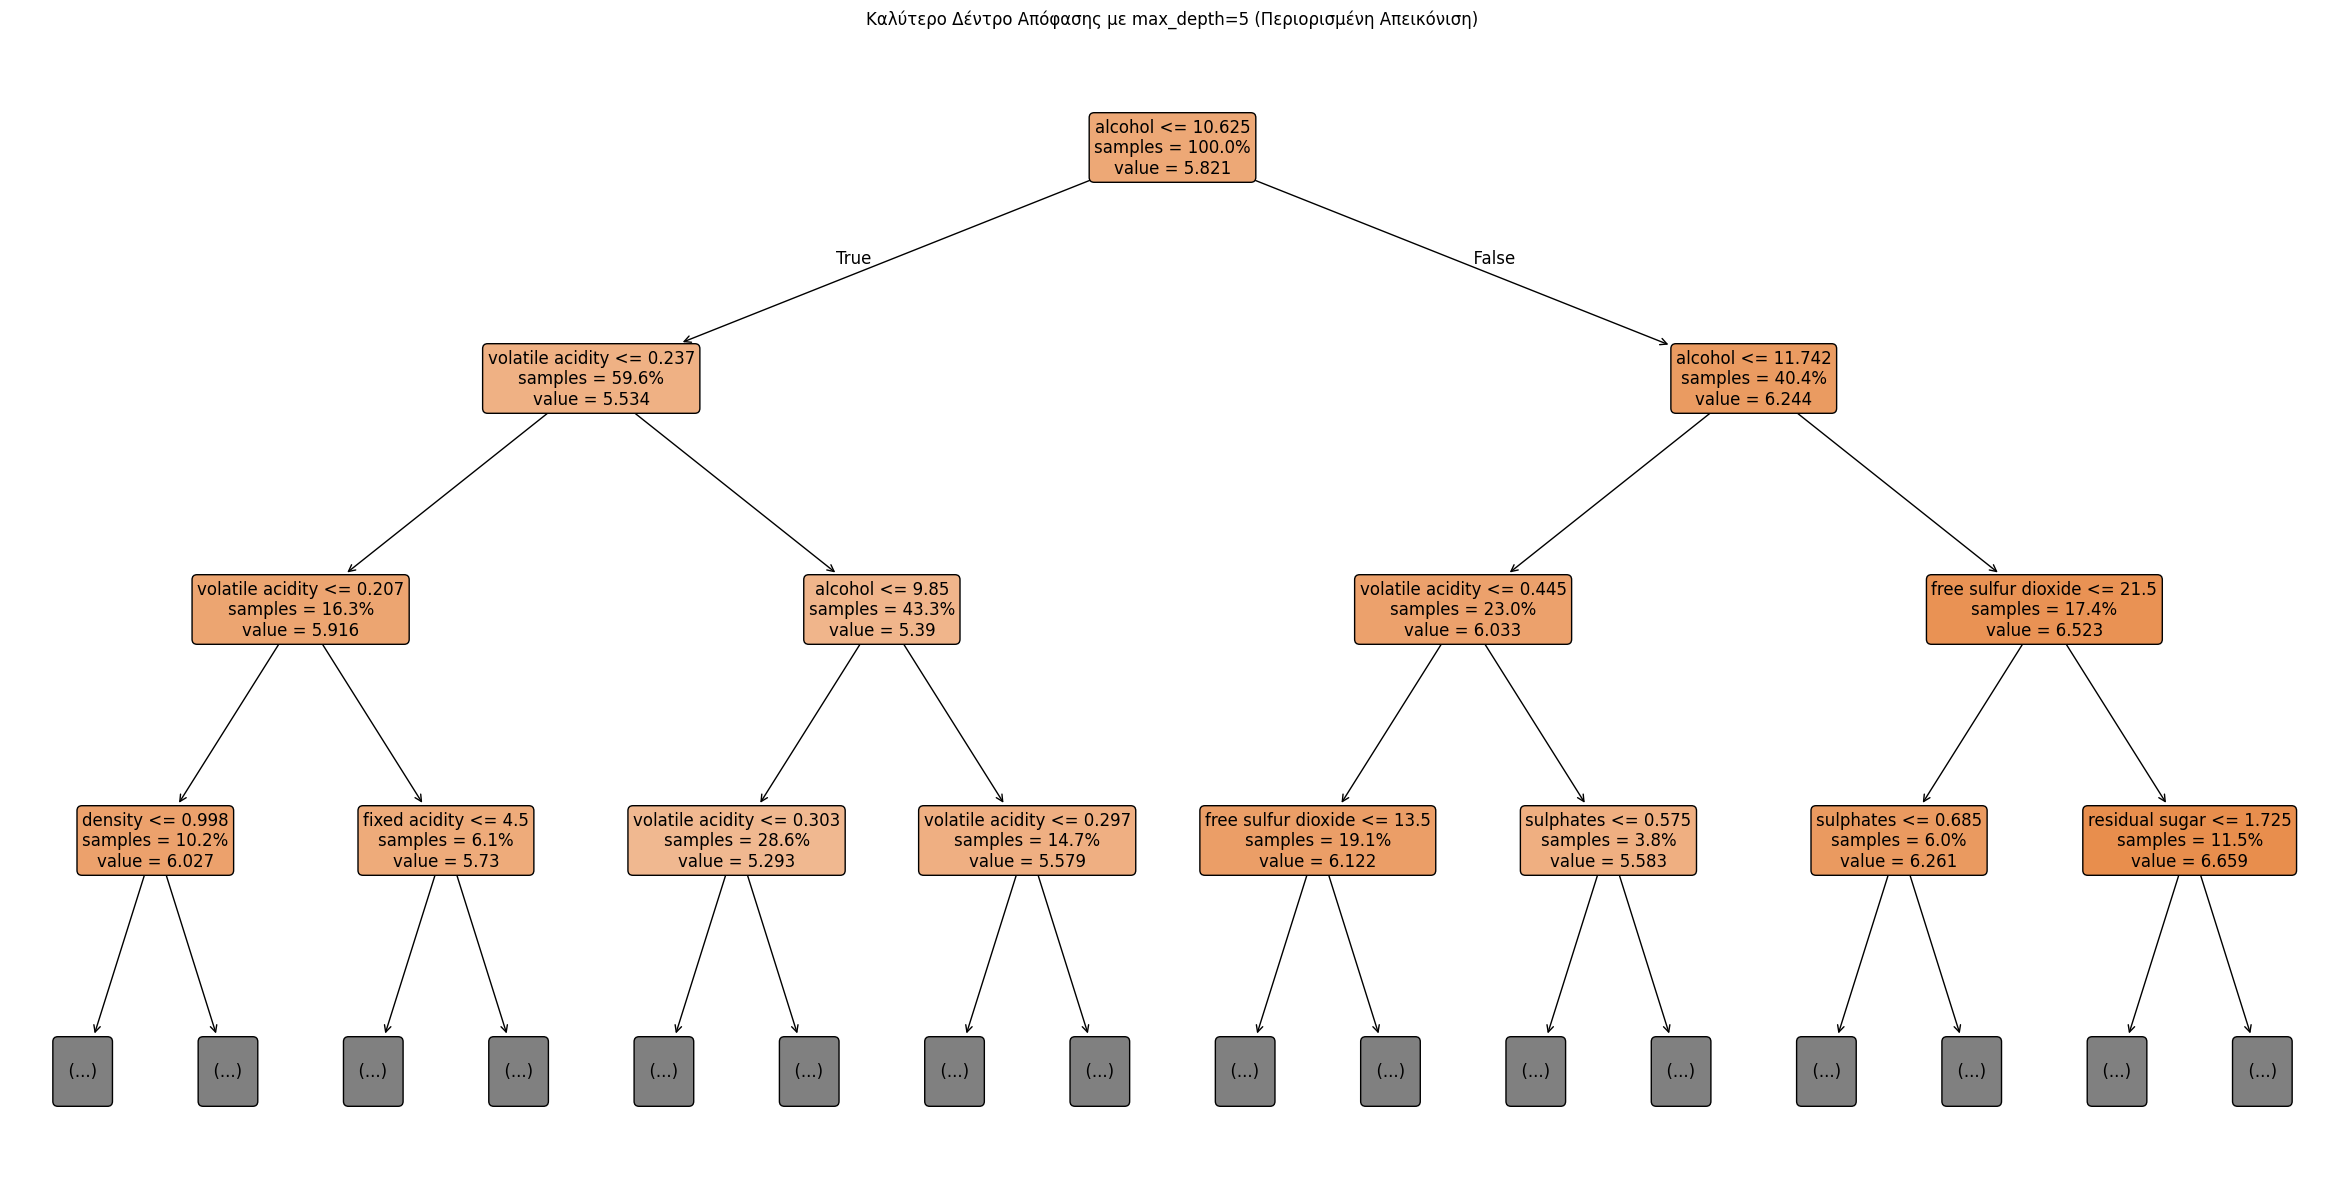

In [ ]:
plt.figure(figsize=(30, 15))  # Μεγαλύτερη διάσταση για καλύτερη ορατότητα
plot_tree(
    best_model,
    filled=True,
    feature_names=x.columns,
    rounded=True,
    max_depth=3,  # Περιορισμός του βάθους για να μειώσουμε τους κόμβους στην απεικόνιση
    fontsize=12,  # Ρύθμιση μεγέθους γραμματοσειράς για καλύτερη αναγνωσιμότητα
    impurity=False,  # Απόκρυψη της τιμής impurity
    proportion=True  # Εμφάνιση ποσοστού παρατηρήσεων σε κάθε κόμβο
)
plt.title("Καλύτερο Δέντρο Απόφασης με max_depth=5 (Περιορισμένη Απεικόνιση)")
plt.show()

Η ποιότητα του κρασιού τείνει να είναι υψηλότερη όταν υπάρχει υψηλή περιεκτικότητα σε alcohol, χαμηλό volatile acidity, μέτρια επίπεδα free sulfur dioxide, υψηλή συγκέντρωση sulphates, και αυξημένη ποσότητα residual sugar.

**Καταγραφή της σημαντικότητας των χαρακτηριστικών από το μοντέλο**

In [ ]:
feature_importances = best_model.feature_importances_

**Ταξινόμηση των χαρακτηριστικών κατά σειρά σημαντικότητας**

In [ ]:
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [x.columns[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

**Δημιουργία ραβδογράμματος**

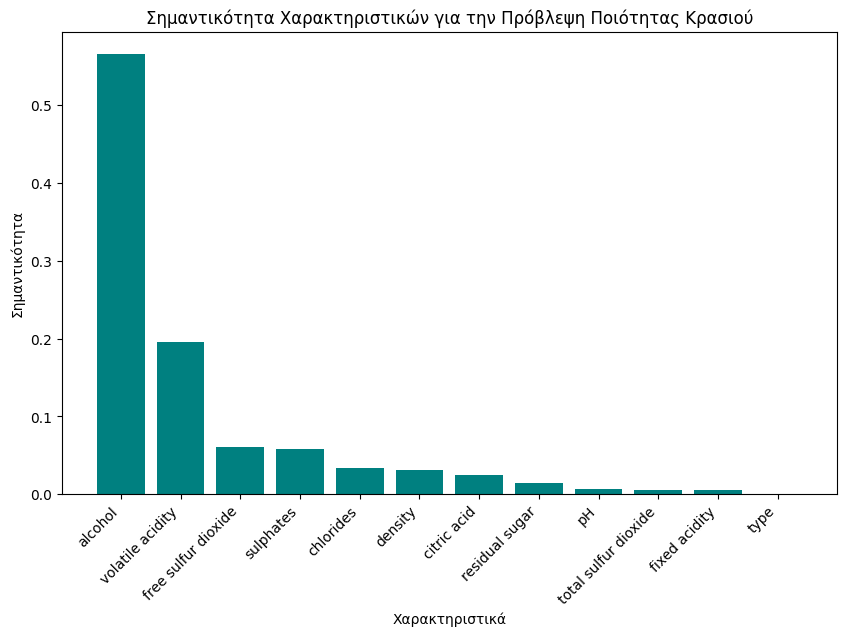

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances, color="teal")
plt.xlabel("Χαρακτηριστικά")
plt.ylabel("Σημαντικότητα")
plt.title("Σημαντικότητα Χαρακτηριστικών για την Πρόβλεψη Ποιότητας Κρασιού")
plt.xticks(rotation=45, ha="right")
plt.show()

Από το ραβδόγραμμα παρατηρούμε ότι τα 5 πιο σημαντικά χαρακτηριστικά για την πρόβλεψη της ποιότητας του κρασιού είναι τα alcohol, volatile acidity, free sulfur dioxide, sulphates και chlorides.